<a href="https://colab.research.google.com/github/dwipaprasetyo/PSDS_Kelas_Dasar_3.0/blob/main/Mini_Project_Dwipa_Prasetyo_Priyoko_1900015031.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Covid-19



##Latar Belakang Dataset

Sejak akhir tahun 2019, seluruh dunia telah digemparkan dengan semakin meningkatnya wabah Corona Virus -19 (Covid-19). Penyakit ini tidak hanya membuat kepanikan, namun banyak memakan korban jiwa. Covid-19 saat ini menjadi trend pembicaraan, perdebatan, diskusi dan bahan berita di medis cetak ataupun medis elektronik. Saat ini trend Covid-19 selalu menjadi trend nomor satu dan trending topic di semua media social tanpa terkecuali.covid-19 pertama kali diidentifikasi di Wuhan, ibu kota provinsi Hubei, China.Virus ini telah menunjukkan bukti penularan dari manusia ke manusia. Tingkat penularan (rate of infection) tampaknya meningkat pada pertengahan Januari 2020. Per 30 Januari 2020, sekitar 8.243 kasus telah dikonfirmasi

## Pertanyaan Analisis

1. Bagaimana perbandingan antara kematian dengan sumbuh?
2. Bagaimana grafik terkonfirmasi covid-19 pada beberapa benua?

##EDA (Exploratory Data Analysis)

In [1]:
#import data
import pandas as pd                           
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('https://raw.githubusercontent.com/dwipaprasetyo/PSDS_Kelas_Dasar_3.0/main/country_wise_latest.csv')
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [2]:
df.shape

(187, 15)

Dataset Covid19 memiliki data dengan 187 baris dan 15 kolom

###Variabel Pada Dataset

In [3]:
df.columns.values

array(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'], dtype=object)

In [4]:
df.dtypes

Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

###Mengecek Missing Data

In [6]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

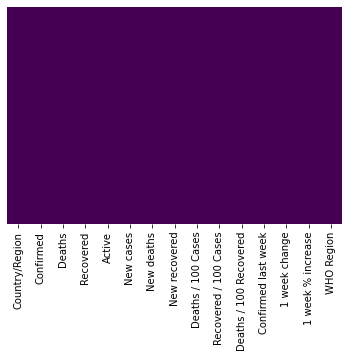

In [7]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

Dari data tersebut dapat disimpulkan bahwa tidak ada data yang kosong

###Mengecek Outlier

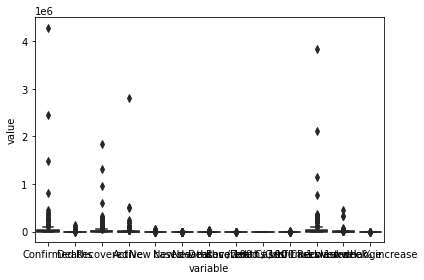

In [8]:
df1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df1))
plt.tight_layout()  


###Melihat Korelasi Data

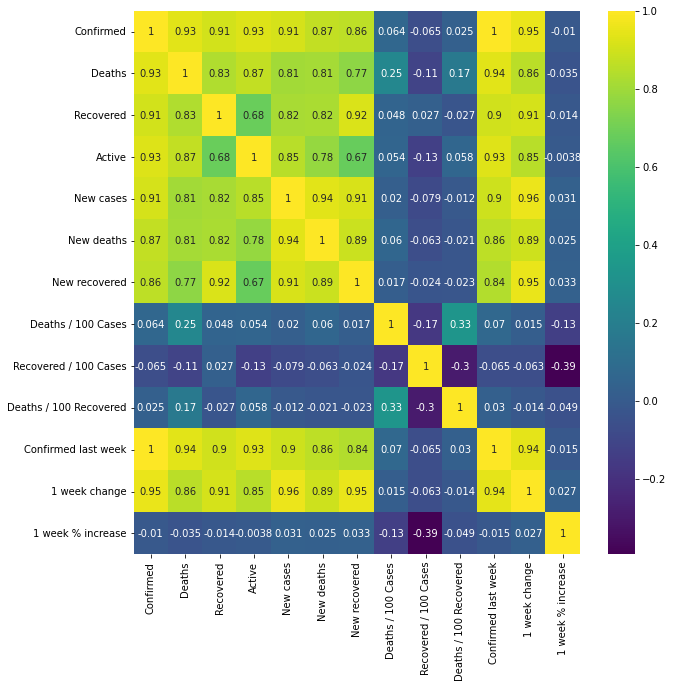

In [9]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap = 'viridis')

###Melihat Statistik Data

In [10]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


###Plot Distribusi Data Numerik

In [11]:
df1=df1.drop(columns=['Deaths / 100 Recovered'])
df1.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,3.834677e+06,455582.000000,226.320000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

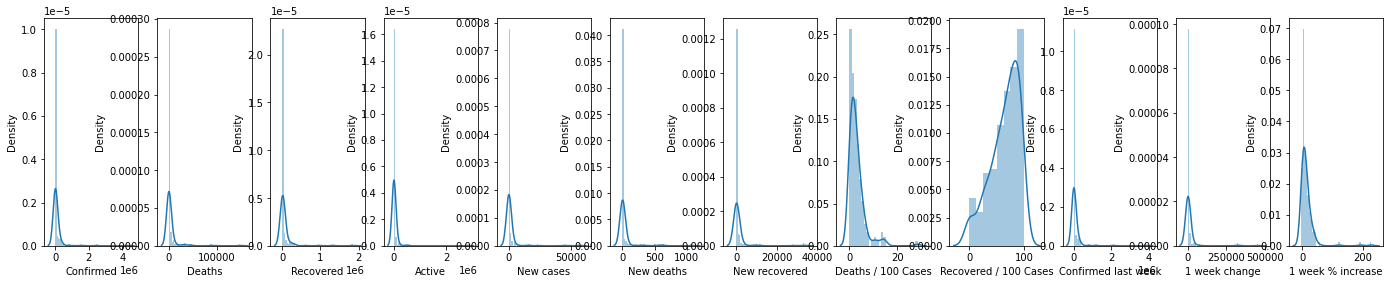

In [12]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

###Pairplot

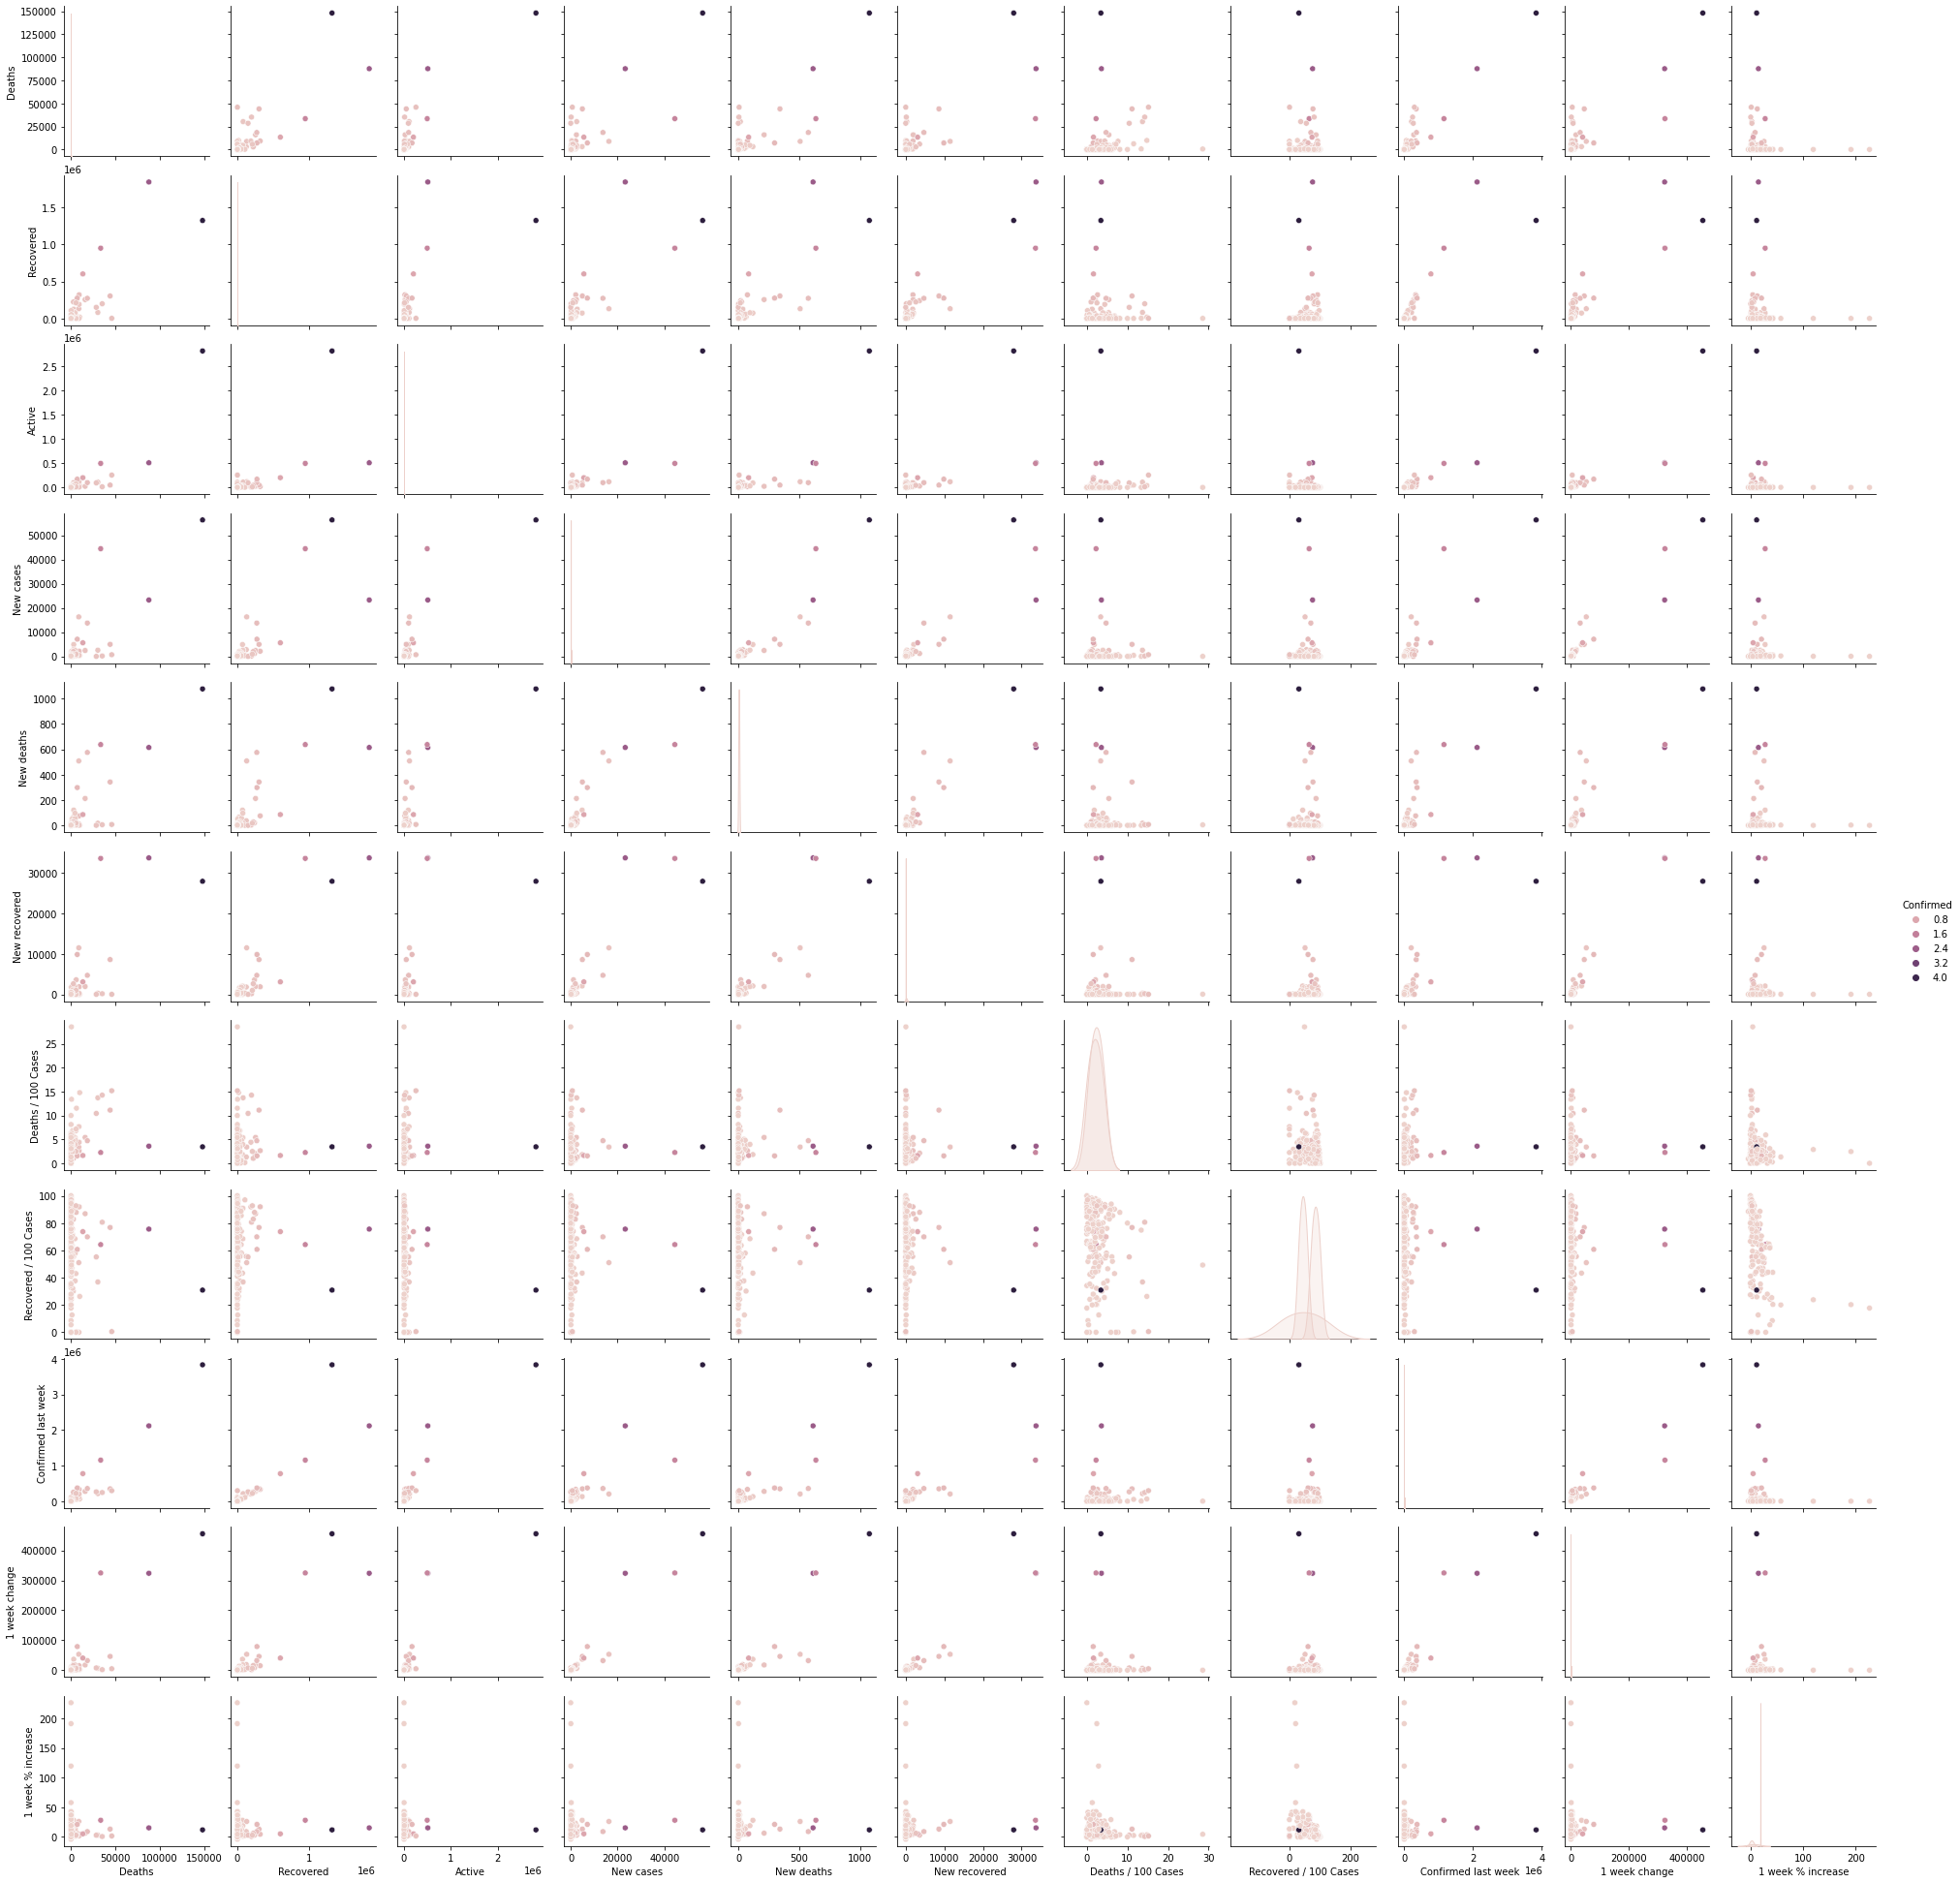

In [13]:
g = sns.pairplot(df1, hue="Confirmed")

## Data Preparation

###Drop Data

In [14]:
df=df.drop(columns=['Country/Region'])
df.head()


,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


### Melakukan Pengkodean(Encoding)

In [15]:
df['WHO Region'].value_counts()

Europe                   56
Africa                   48
Americas                 35
Eastern Mediterranean    22
Western Pacific          16
South-East Asia          10
Name: WHO Region, dtype: int64

In [16]:
#Encoding dengan data sedikit
cleanup_nums = {"WHO Region":     {"Europe": 1, "Africa": 2, "Americas": 3, "Eastern Mediterranean": 4,"Western Pacific": 5,"South-East Asia": 6}}
df = df.replace(cleanup_nums)
df.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,4
1,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,1
2,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,2
3,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,1
4,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,2


###Menghapus Outlier

In [17]:
#Menghitung Skor IQR
sorted(df)

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Confirmed                 39346.500
Deaths                      715.500
Recovered                 21979.500
Active                     9007.500
New cases                   415.500
New deaths                    6.000
New recovered               221.000
Deaths / 100 Cases            2.930
Recovered / 100 Cases        38.115
Deaths / 100 Recovered        4.990
Confirmed last week       36029.000
1 week change              3123.000
1 week % increase            14.080
WHO Region                    3.000
dtype: float64


In [18]:
#Menghapus Outlier
df_clear = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clear

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,4
1,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,1
3,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,1
5,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,3
7,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,1202,35,951,216,10,1,3,2.91,79.12,3.68,1064,138,12.97,3
180,15988,146,9959,5883,525,4,213,0.91,62.29,1.47,12334,3654,29.63,3
181,431,0,365,66,11,0,0,0.00,84.69,0.00,384,47,12.24,5
182,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,4


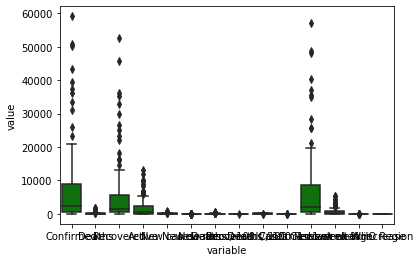

In [19]:
#Melihat Outlier
sns.boxplot(x="variable", y="value", color='green',orient='v', data=pd.melt(df_clear))

plt.show()

###Normalisasi Data

In [20]:
#Normalisasi data dengan MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)

df_norm

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,0.612710,0.719388,0.479871,0.741840,0.145007,0.714286,0.038710,0.430504,0.6949,0.415842,0.621080,0.142987,0.143169,0.6
1,0.082278,0.081633,0.052276,0.150776,0.160055,0.428571,0.135484,0.362854,0.5625,0.433168,0.072734,0.137881,0.504845,0.0
2,0.015127,0.029478,0.015292,0.003938,0.013680,0.000000,0.000000,0.704797,0.8853,0.534653,0.015250,0.012767,0.156008,0.0
3,0.001251,0.001701,0.001238,0.001363,0.005472,0.000000,0.010753,0.429274,0.7558,0.381188,0.001119,0.010396,0.411822,0.4
4,0.631759,0.403061,0.507808,0.758349,0.099863,0.428571,0.402151,0.233702,0.7132,0.220297,0.611549,0.447930,0.259932,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,0.020113,0.019841,0.018111,0.016357,0.013680,0.071429,0.006452,0.357934,0.7912,0.303630,0.018398,0.033741,0.407219,0.4
115,0.270025,0.082766,0.189659,0.445513,0.718194,0.285714,0.458065,0.111931,0.6229,0.121287,0.215491,0.674995,0.810804,0.4
116,0.007082,0.000000,0.006951,0.004998,0.015048,0.000000,0.000000,0.000000,0.8469,0.000000,0.006506,0.017144,0.389535,0.8
117,0.179312,0.044218,0.071453,0.514275,0.207934,0.142857,0.000000,0.089791,0.3533,0.171617,0.155716,0.319533,0.556202,0.6


### Memilih Variable Target & Variabel Independent

In [21]:
y=df_norm['WHO Region']
X=df_norm.drop(columns=['WHO Region'])

#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

print(y)
print(X)

[0.6 0.  0.  0.4 0.  0.8 0.  0.6 0.4 0.4 0.2 1.  0.  0.8 0.  0.2 1.  0.2
 0.2 0.8 0.2 0.2 0.2 0.2 0.2 0.2 0.4 0.2 0.  0.4 0.  0.  0.  0.6 0.4 0.4
 0.2 0.2 0.  0.2 0.8 0.  0.2 0.  0.2 0.  0.4 0.2 0.2 0.4 0.4 0.  0.  0.
 0.4 0.8 0.6 0.2 0.8 0.  0.6 0.2 0.  0.  0.  0.2 0.8 1.  0.2 0.  0.2 0.2
 0.  0.  0.8 0.  0.6 0.2 0.8 0.4 0.2 0.  0.  0.4 0.  0.  0.2 0.4 0.4 0.4
 0.  0.2 0.2 0.2 0.2 0.8 0.  0.  0.6 0.8 0.2 1.  0.6 0.4 0.8 0.  0.2 1.
 1.  0.2 0.4 0.6 0.2 0.6 0.4 0.4 0.8 0.6 0.2]
[[0.61271022 0.71938776 0.4798705  ... 0.62108043 0.14298742 0.1431686 ]
 [0.08227837 0.08163265 0.05227576 ... 0.07273395 0.13788072 0.50484496]
 [0.01512719 0.02947846 0.01529233 ... 0.01524982 0.01276673 0.15600775]
 ...
 [0.00708189 0.         0.00695106 ... 0.00650566 0.0171439  0.38953488]
 [0.17931209 0.04421769 0.07145306 ... 0.15571606 0.3195331  0.55620155]
 [0.07673456 0.07936508 0.05360884 ... 0.05795631 0.23217217 0.98594961]]


### Membagi Data Menjadi Data Training dan Data Testing

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y)

## Data Visualization

In [23]:
import plotly.express as px
import pandas as pd
#Menyiapkan Data
df = pd.read_csv('https://raw.githubusercontent.com/dwipaprasetyo/PSDS_Kelas_Dasar_3.0/main/country_wise_latest.csv')
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


###Membandingkan Variabel Death dengan Recovered pada baris 0 sampai 30

In [24]:
df = df.iloc[:31, 2:4]
df

,Deaths,Recovered
0,1269,25198
1,144,2745
2,1163,18837
3,52,803
4,41,242
5,3,65
6,3059,72575
7,711,26665
8,167,9311
9,713,18246


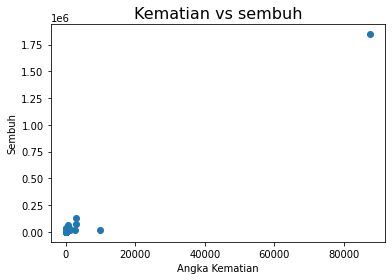

In [25]:
import sys
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
import numpy as np

X=df['Deaths']
Y=df['Recovered']
x = np.array(X)
y = np.array(Y)
plt.title("Kematian vs sembuh",size = 16)
plt.xlabel("Angka Kematian")
plt.ylabel("Sembuh")

plt.scatter(x, y)
plt.show()

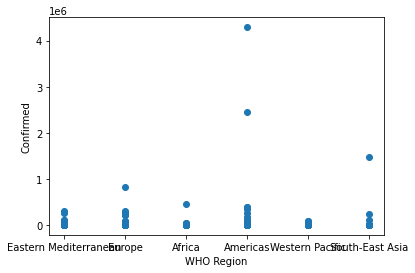

In [28]:
import plotly.express as px
import pandas as pd
#Menyiapkan Data
df = pd.read_csv('https://raw.githubusercontent.com/dwipaprasetyo/PSDS_Kelas_Dasar_3.0/main/country_wise_latest.csv')
df
import sys

plt.scatter(df['WHO Region'],df['Confirmed'])
plt.xlabel('WHO Region')
plt.ylabel('Confirmed')
plt.savefig('scatter.png')
plt.show()